---
---
# CLASSIFICATIONS MODELS
---
---

* GEREKLİ KÜTÜPHANELER

In [66]:
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
from sklearn.cluster         import KMeans
from yellowbrick.cluster     import KElbowVisualizer
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing   import StandardScaler
from sklearn.decomposition   import PCA
import warnings


warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# VERİ SETİ

In [3]:
df = pd.read_csv("USArrests.csv", index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


array([[<Axes: title={'center': 'Murder'}>,
        <Axes: title={'center': 'Assault'}>],
       [<Axes: title={'center': 'UrbanPop'}>,
        <Axes: title={'center': 'Rape'}>]], dtype=object)

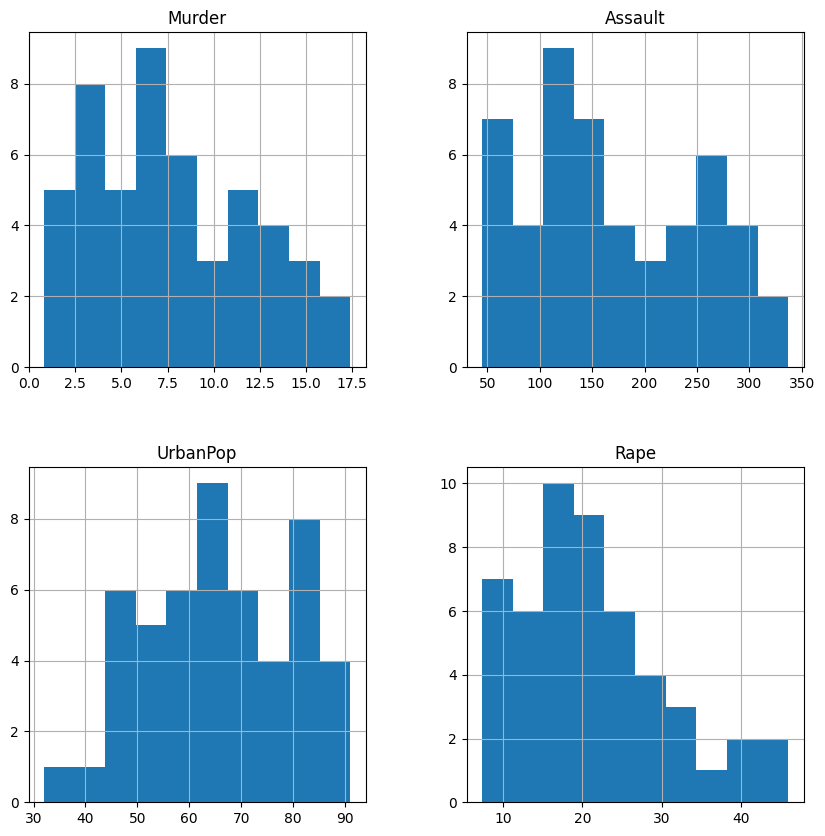

In [8]:
df.hist(figsize=(10,10))

---
# K-MEANS
---

In [15]:
kmeans = KMeans(n_clusters=4)
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [16]:
k_fit = kmeans.fit(df)

In [17]:
k_fit.n_clusters

4

In [18]:
k_fit.cluster_centers_

array([[  6.27058824, 147.52941176,  69.88235294,  19.90588235],
       [ 11.8       , 242.07692308,  70.84615385,  29.43076923],
       [  3.98571429,  75.21428571,  55.57142857,  12.8       ],
       [ 12.26666667, 305.        ,  65.        ,  26.9       ]])

In [20]:
k_fit.labels_ #hangi clusterlara ait

array([1, 1, 3, 0, 1, 1, 0, 1, 3, 1, 2, 0, 1, 0, 2, 0, 2, 1, 2, 3, 0, 1,
       2, 1, 0, 2, 2, 1, 2, 0, 3, 1, 3, 2, 0, 0, 0, 2, 0, 3, 2, 0, 1, 0,
       2, 0, 0, 2, 2, 0])

# Kümelerin Görselleştirilmesi

In [21]:
k_means = KMeans(n_clusters=2).fit(df)
k_means.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [23]:
kumeler = k_means.labels_
kumeler

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

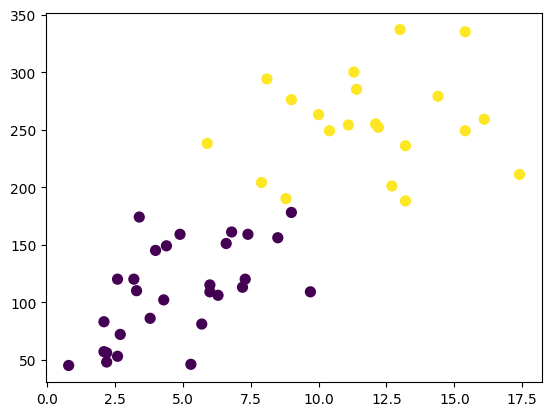

In [25]:
plt.scatter(df.iloc[:,0], df.iloc[0:,1], c= kumeler, s=50,cmap="viridis");

#iloc sütunlardan bağımsız seçme
#loc sütunlara bağımlı seçme

In [26]:
merkezler = k_means.cluster_centers_
merkezler

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

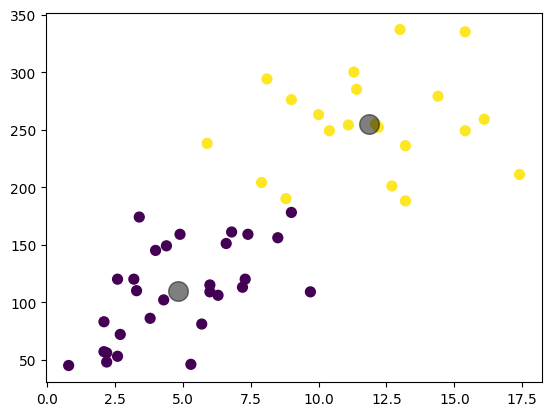

In [28]:
plt.scatter(df.iloc[:,0], df.iloc[0:,1],    c = kumeler, s=50,cmap="viridis");

plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s=200,alpha=0.5);


# Optimum Küme Sayısının Belirlenmesi

## Elbow Yöntemi

In [30]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [37]:
# uzaklı farklarının karelerinin toplamı
ssd = []
K = range(1,30)
for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)
ssd

[355807.8216,
 96399.02814449919,
 55874.704545454544,
 40834.69567821067,
 28240.231698412703,
 18875.464222222225,
 15841.516055555552,
 14704.418496031743,
 13026.479107142859,
 11607.645976190477,
 10459.857857142855,
 8612.921142857142,
 8007.331642857143,
 8201.02530952381,
 6345.3529285714285,
 5272.078833333333,
 4852.455000000001,
 4140.742333333334,
 3628.039833333334,
 3774.2753333333335,
 3417.6705,
 2779.2191666666668,
 2661.315119047619,
 2398.2603333333327,
 2163.5916666666667,
 2127.93,
 1689.8806666666667,
 1690.3416666666667,
 1514.9508333333335]

Text(0.5, 1.0, 'Optimum Kume Sayisi icin Elbow Yontemi')

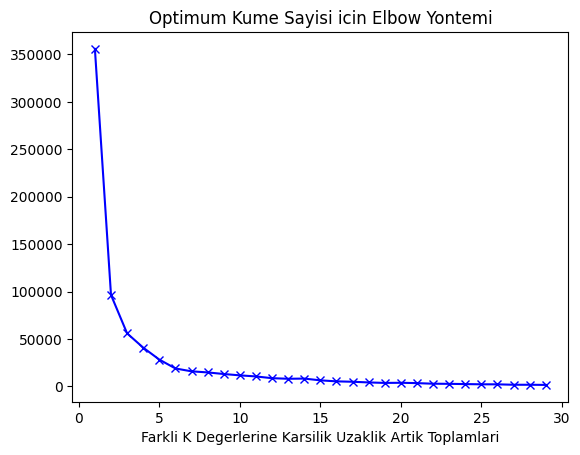

In [38]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Farkli K Degerlerine Karsilik Uzaklik Artik Toplamlari")
plt.title("Optimum Kume Sayisi icin Elbow Yontemi")

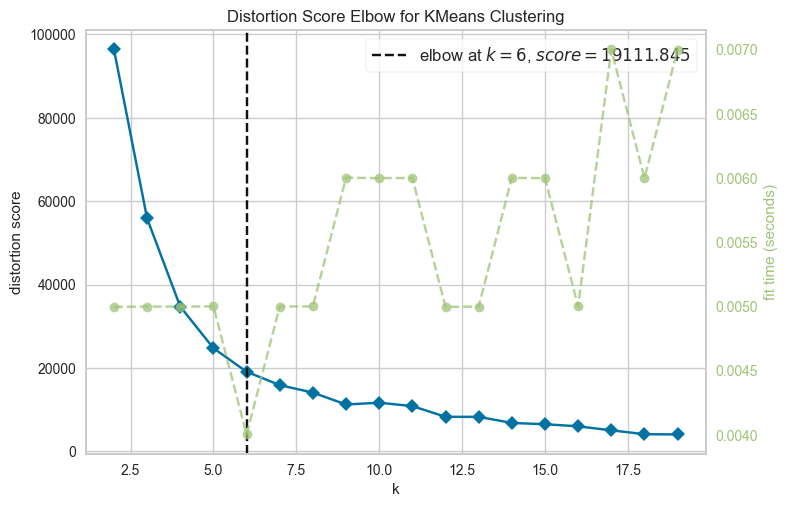

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
#Başka şekilde gösterme , yellowbrick kütüphanesi
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,20))
visu.fit(df)
visu.poof()

In [42]:
# final model
kmeans = KMeans(n_clusters=6).fit(df)

In [43]:
kumeler = kmeans.labels_
pd.DataFrame({"Eyaletler": df.index, "Kumeler": kumeler})

,Eyaletler,Kumeler
0,Alabama,3
1,Alaska,3
2,Arizona,1
3,Arkansas,5
4,California,1
5,Colorado,5
6,Connecticut,4
7,Delaware,3
8,Florida,1
9,Georgia,5


In [44]:
df["Kume_No"] = kumeler
df

,Murder,Assault,UrbanPop,Rape,Kume_No
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,3
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,5
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,5
Connecticut,3.3,110,77,11.1,4
Delaware,5.9,238,72,15.8,3
Florida,15.4,335,80,31.9,1
Georgia,17.4,211,60,25.8,5


---
# HİYERARŞİK KÜMELEME
---

In [46]:
hc_complete = linkage(df, "complete")
hc_average  = linkage(df, "average")

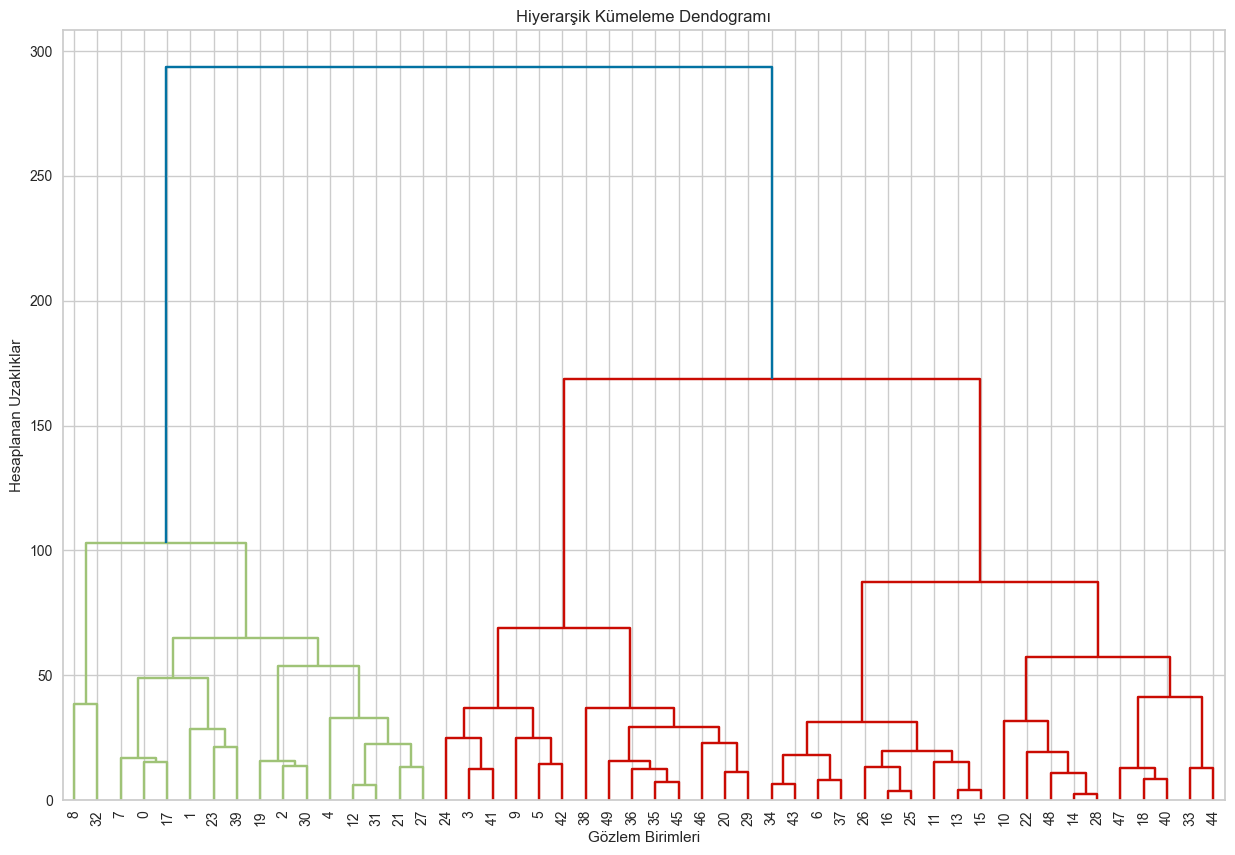

In [50]:
plt.figure(figsize=(15,10))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Hesaplanan Uzaklıklar")

dendrogram(hc_complete,
           leaf_font_size=10);

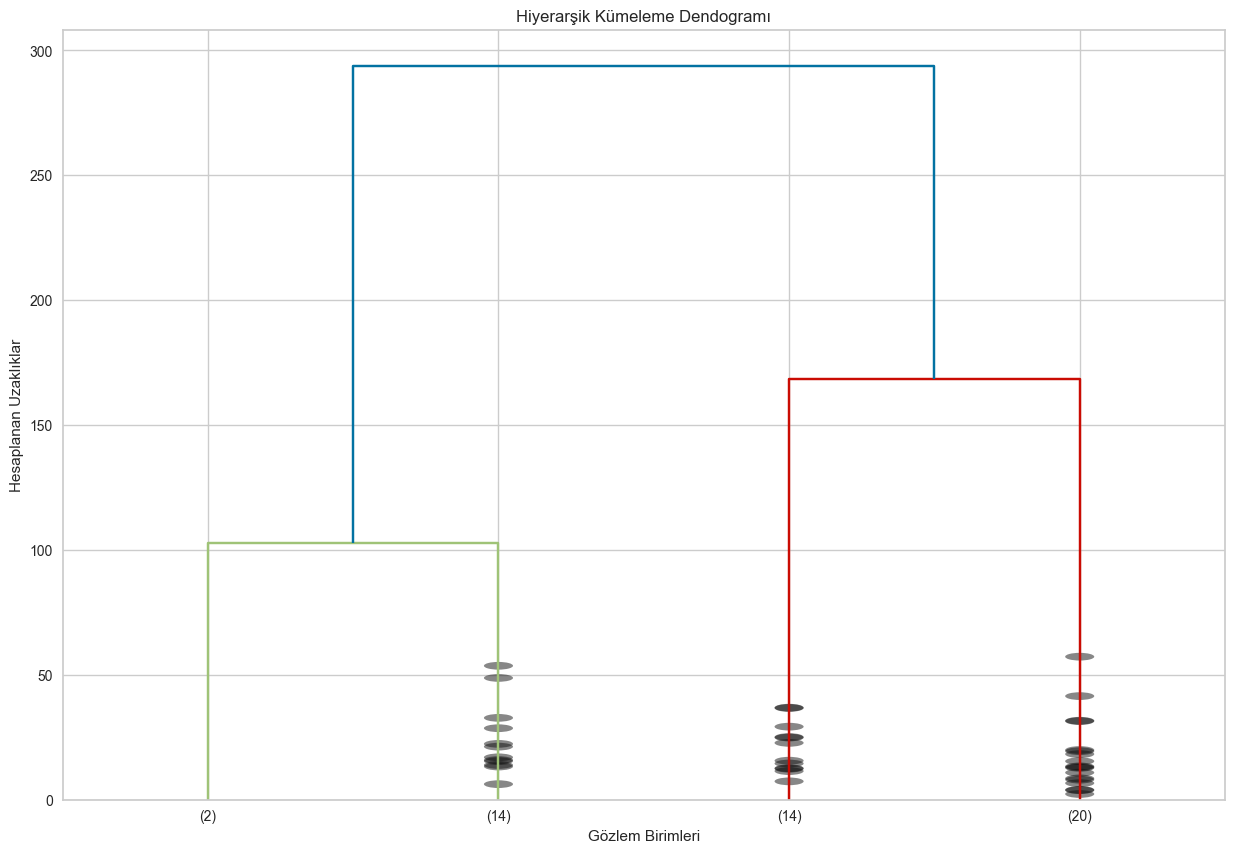

In [98]:
plt.figure(figsize=(15,10))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Hesaplanan Uzaklıklar")

dendrogram(hc_complete,
           truncate_mode="lastp",
           p=4,
           show_contracted=True,
           leaf_font_size=10);

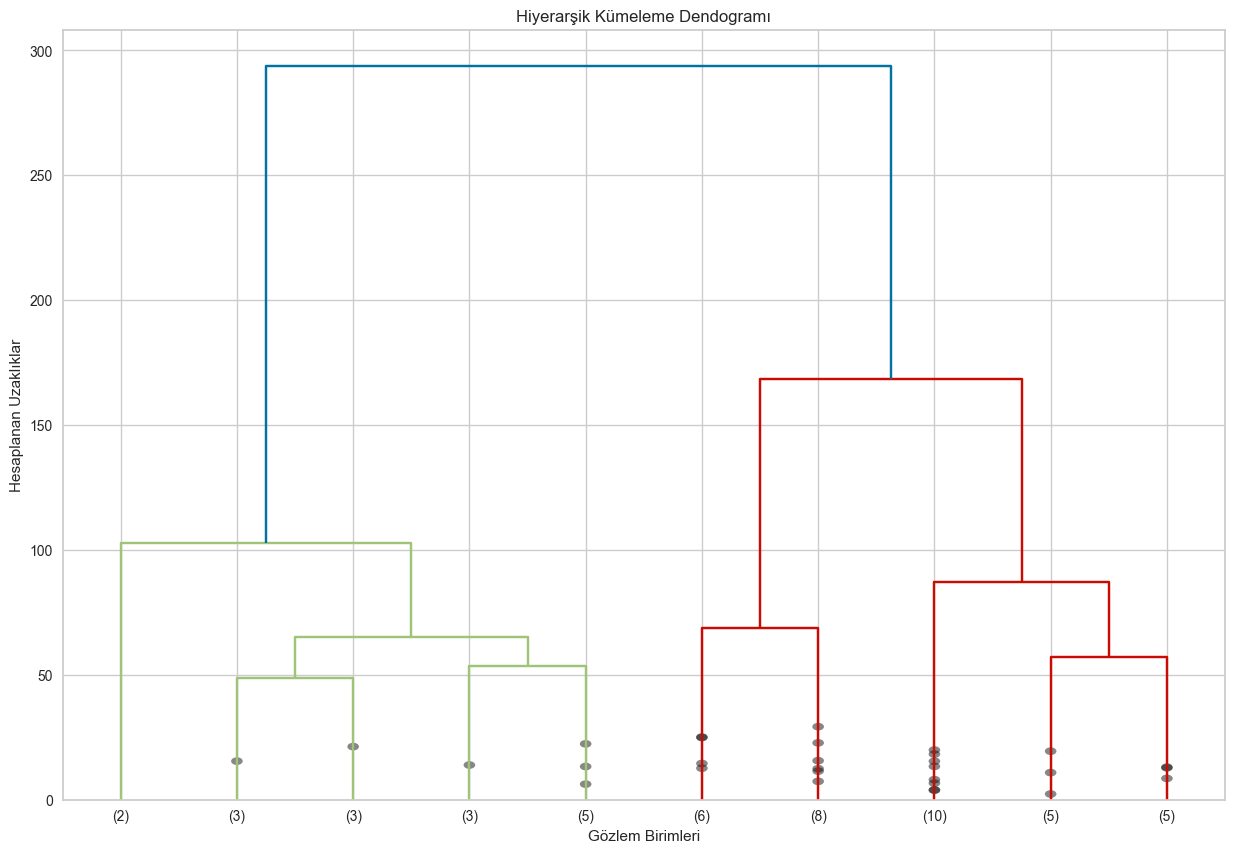

In [56]:
plt.figure(figsize=(15,10))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Hesaplanan Uzaklıklar")

dendrogram(hc_complete,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10);

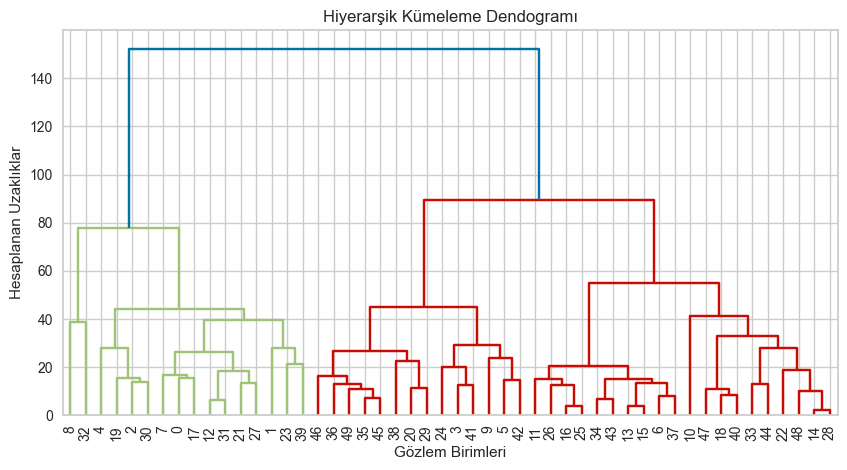

In [58]:
plt.figure(figsize=(10,5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Hesaplanan Uzaklıklar")

dendrogram(hc_average,
           leaf_font_size=10);

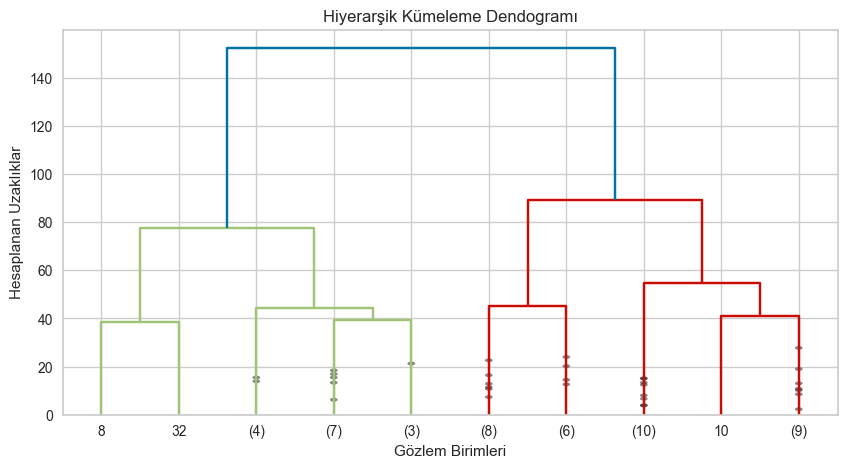

In [60]:
plt.figure(figsize=(10,5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Hesaplanan Uzaklıklar")

dendrogram(hc_average,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10);

---
# TEMEL BİLEŞEN ANALİZİ
---

In [62]:
df = pd.read_csv("../linear_regression/Hitters.csv")
df.dropna(inplace=True)
df = df._get_numeric_data()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [65]:
# standartlaştırma
df = StandardScaler().fit_transform(df)
df[0:5,0:5]

array([[-0.6029005 , -0.59567545, -0.5285512 , -1.2061115 , -0.52206292],
       [ 0.51254171,  0.49225957,  0.72996619,  0.44151497,  0.79405962],
       [ 0.62816682,  0.73648988,  0.95878753,  0.40228577,  1.02631654],
       [-0.56209164, -0.46245892, -0.18531919, -0.61767348, -0.36722498],
       [ 1.29471156,  1.35816704, -0.87178322,  0.75534858, -0.0188396 ]])

In [69]:
pca     = PCA(n_components=2)   #model nesnesi
pca_fit = pca.fit_transform(df) #fit

In [71]:
bilesen_df = pd.DataFrame(data = pca_fit, columns=["Birinci Bilesen","İkinci Bilesen"])
bilesen_df

,Birinci Bilesen,İkinci Bilesen
0,0.076848,-1.653525
1,0.337127,2.320560
2,3.408362,-0.755757
3,-2.642221,0.361486
4,1.071681,1.511674
...,...,...
258,-0.152111,0.331665
259,3.241373,0.391942
260,-1.206322,0.625714
261,2.084856,2.059851


In [73]:
pca.explained_variance_ratio_ # toplarsak bu 2 bileşenle 
                              # veri setinin ~%70'i açıklanıyor.

array([0.45245466, 0.24246801])

In [77]:
pca.components_ # tüm bilesenler

array([[ 0.19506377,  0.19410007,  0.19690453,  0.19491272,  0.22956638,
         0.20673717,  0.271085  ,  0.31970454,  0.32077315,  0.30810145,
         0.32761493,  0.32977446,  0.30573146,  0.08303783,  0.00159189,
        -0.00529271,  0.24914187],
       [ 0.38407792,  0.37764493,  0.22866298,  0.37459128,  0.31026531,
         0.23115759, -0.26820405, -0.19641268, -0.18589726, -0.13386448,
        -0.17692929, -0.17283361, -0.19698297,  0.16295204,  0.17624626,
         0.20978299,  0.05452611]])

In [78]:
pca.components_[1] #1.bilesen

array([ 0.38407792,  0.37764493,  0.22866298,  0.37459128,  0.31026531,
        0.23115759, -0.26820405, -0.19641268, -0.18589726, -0.13386448,
       -0.17692929, -0.17283361, -0.19698297,  0.16295204,  0.17624626,
        0.20978299,  0.05452611])

# Optimum Bilesen Sayisi

In [84]:
df.shape

(263, 17)

Text(0, 0.5, 'Kümülatif Varyans Oranı')

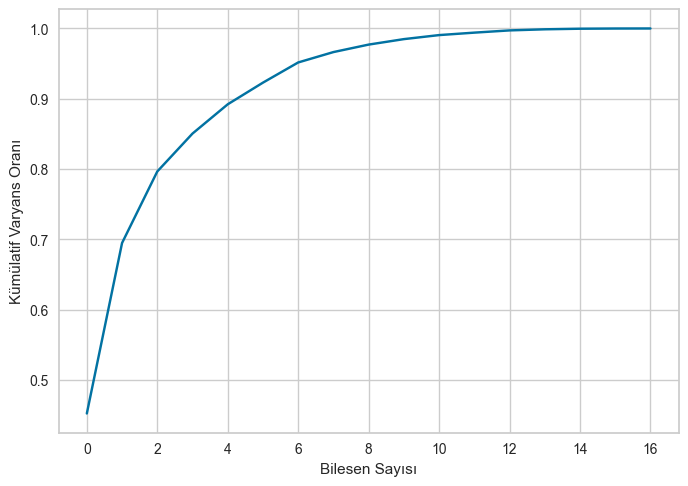

In [85]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_));
plt.xlabel("Bilesen Sayısı")
plt.ylabel("Kümülatif Varyans Oranı")

In [90]:
pca.explained_variance_ratio_

array([4.52454661e-01, 2.42468012e-01, 1.01696801e-01, 5.39343967e-02,
       4.16143455e-02, 3.08119274e-02, 2.86933912e-02, 1.47589096e-02,
       1.06379741e-02, 7.78968542e-03, 5.72654636e-03, 3.49183444e-03,
       3.16734133e-03, 1.57268674e-03, 8.27965421e-04, 2.82821576e-04,
       7.06999352e-05])

In [96]:
#final model,  örneğin 3 bileşen seçtik;
pca     = PCA(n_components=3) 
pca_fit = pca.fit_transform(df) 
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[0.45245466 0.24246801 0.1016968 ]
0.7966194743589905
